# Part 3: Aircrash Analytics- Data Mining

* Since you're viewing this IPython Notebook, it is assumed that you have gone through the previous ones ( Fligh Crash Data Crawler.ipynb and Data Wrangling- Adding Latitudes and Longitudes using Google Maps Geocoding API.ipynb). If you have not, please go back and have a look at them!


* The aim of this IPython Notebook is to perform some exploratory data analysis on the wrangled dataset that we have obtained.


* Due to the limited scope of this project, we will try to extract the following insights:

    1. Total Planes that have crashed in our dataset
    2. Total Number of people that have died/survived from aircraft crashes
    3. Total number of people on board a crashing plane that have survived
    4. Fatalities per Year vs Crashes per Year - stats, visuals, correlation
    5. Annual Deaths due to Plane Crashes
    6. Trend of Plane Crashes over the years
    7. Year with most fatalities
    8. Year with most flight crashes
    9. Frequency of Fatalities every decade
    10. Frequency of Fatalities every 5 years
    11. Frequency of Crashes every Decade
    12. Frequency of Crashes every 5 years
    13. Month wise trends
    14. Aircraft Manufacturers- Insights 
    15. Aircraft Carriers- Insights
    16. Scatterplot Matrix of all fields- exploration
    17. TEXT MINING: Hierarchial Clustering to determine the cause of air crash

### Importing the required packages:


In [1]:
from pymongo import MongoClient
import numpy as np
from matplotlib.pyplot import *

### Connecting to the Mongo DB client running on the same machine. 
* Must change if the Mongo DB is running on a separate machine. Check MongoDB [docs](https://api.mongodb.org/python/current/api/pymongo/mongo_client.html#pymongo.mongo_client.MongoClient)

In [2]:
client = MongoClient()
db = client['aircrashdata_backup2']
collection = db['data']

In [3]:
# load cursor into pandas data frame
import pandas as pd
cursor = collection.find()
print cursor.count()

5718


### Loading the data from MongoDB into Pandas
* <b> Pandas: </b> For those of you who are not familiar with it, <i>Pandas</i> is a brilliant BSD-licensed library that provides high-performance, easy-to-use data structures and data analysis tools for the Python programming language. The most useful composite data structure from it would be the <i>DataFrame</i>.

In [4]:
#Writing to mongodb, creating a new column for year, day and month
cursor = collection.find()
print cursor.count()
for i in cursor:
    collection.find_one_and_update({'_id':i["_id"]},{'$set':{'year':i['date'].year}})
    collection.find_one_and_update({'_id':i["_id"]},{'$set':{'day':i['date'].day}})
    collection.find_one_and_update({'_id':i["_id"]},{'$set':{'month':i['date'].month}})

5718


In [5]:
cursor = collection.find()
df =  pd.DataFrame(list(cursor))

## 1. Total Planes that have crashed in our dataset

In [6]:
print "TOTAL PLANES CRASHED IN OUR DATASET: " + str(df['_id'].count())

TOTAL PLANES CRASHED IN OUR DATASET: 5718


## 2. Total Number of people that have died/survived from aircraft crashes

In [7]:
#Pre processing
dfa = df[['aboard_total','fatalities_total','ground']]
dfa_ints = dfa[dfa.aboard_total != 'NULL']
dfa_ints = dfa_ints[dfa.fatalities_total != 'NULL']
dfa_ints = dfa_ints[dfa.ground != 'NULL']
print "Number of Data points for this stat :   " + str(dfa_ints['aboard_total'].count())
dfa_ints['aboard_total'] = dfa_ints['aboard_total'].astype(int)
dfa_ints['fatalities_total'] = dfa_ints['fatalities_total'].astype(int)
dfa_ints['ground'] = dfa_ints['ground'].astype(int)
dfa_ints['total_deaths'] = dfa_ints.fatalities_total + dfa_ints.ground
dfa_ints['total_survivors'] = dfa_ints.aboard_total - dfa_ints.fatalities_total

# Total number of people that have died
print "TOTAL DEATHS: (ATLEAST) " + str(dfa_ints.total_deaths.sum())

Number of Data points for this stat :   5656
TOTAL DEATHS: (ATLEAST) 118715


C:\Users\admin\Downloads\WinPython-64bit-2.7.10.1\python-2.7.10.amd64\lib\site-packages\pandas\core\frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


## 3. Total number of people on board a crashing plane that have survived

In [8]:
#Total number of people on board a crashing plane that have survived:

total_survivors = dfa_ints.total_survivors.sum()
total_deaths = dfa_ints.total_deaths.sum()

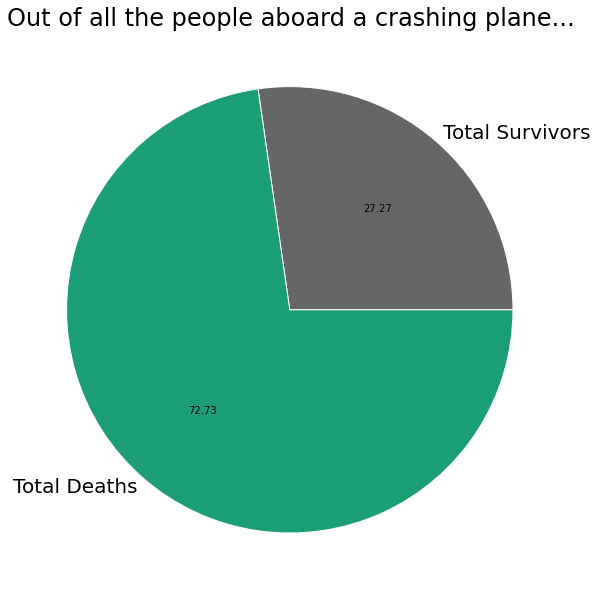

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
total_aboard_deaths = dfa_ints.fatalities_total.sum()
slices = [total_survivors,total_aboard_deaths]
total = total_survivors + total_deaths
labels = ["Total Survivors", "Total Deaths"]
cmap = plt.cm.Dark2_r
colors = cmap(np.linspace(0., 1., len(slices)))

slices = sorted(slices)

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)

pie_wedge_collection = ax.pie(slices, colors=colors, labels=labels, labeldistance=1.05, autopct='%.2f');

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')

rcParams['font.size'] = 20.0
ax.set_title("Out of all the people aboard a crashing plane...")

## 4. Fatalities per Year vs Crashes per Year

In [10]:
#Pre processing
dfa = df[['aboard_total','fatalities_total','ground']]
dfa_ints = dfa[dfa.aboard_total != 'NULL']
dfa_ints = dfa_ints[dfa.fatalities_total != 'NULL']
dfa_ints = dfa_ints[dfa.ground != 'NULL']
print "Number of Data points for this stat :   " + str(dfa_ints['aboard_total'].count())
dfa_ints['aboard_total'] = dfa_ints['aboard_total'].astype(int)
dfa_ints['fatalities_total'] = dfa_ints['fatalities_total'].astype(int)
dfa_ints['ground'] = dfa_ints['ground'].astype(int)
dfa_ints['total_deaths'] = dfa_ints.fatalities_total + dfa_ints.ground
dfa_ints['total_survivors'] = dfa_ints.aboard_total - dfa_ints.fatalities_total

# Total number of people that have died
print "TOTAL DEATHS: (ATLEAST) " + str(dfa_ints.total_deaths.sum())

Number of Data points for this stat :   5656
TOTAL DEATHS: (ATLEAST) 118715


In [11]:
## Create a view that consists of the year and fatalities
df1 = df[['year','fatalities_total','ground']]
#Taking all values except null
df_1 = df1[df1.fatalities_total != 'NULL']
#Type casting total fatalities to integer
df_1['fatalities_total'] = df_1['fatalities_total'].astype(int)                            


C:\Users\admin\Downloads\WinPython-64bit-2.7.10.1\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
print 'Total number of records: ' + str(df['fatalities_total'].count())
print 'Number of records that have fatalities mentioned: ' + str(df_1['fatalities_total'].count())
print 'Therfore, number of records in which the number of fatalities is unknown: ' + str(df['fatalities_total'].count()-df_1['fatalities_total'].count())

Total number of records: 5718
Number of records that have fatalities mentioned: 5707
Therfore, number of records in which the number of fatalities is unknown: 11


In [13]:
# fatalities by year
by_year = df_1.groupby('year')
df_by_year = by_year.aggregate(np.sum)
df_by_year.to_csv(r'C:\Users\admin\Desktop\GE2324\years_and_onboard_fatalities.tsv', sep='\t', na_rep='NULL', encoding='utf8')
#del df_by_year['fatalities_in_year']

# aircrashes by year
by_year = df_1.groupby('year')
aircrashes_by_year = by_year.agg({'fatalities_total':{'total':'count'}})
aircrashes_by_year.to_csv(r'C:\Users\admin\Desktop\GE2324\years_and_crashes.tsv', sep='\t', na_rep='NULL', encoding='utf8')

aircrashes_by_year.columns = aircrashes_by_year.columns.droplevel(0)
#Calculating Pearson's correlation coefficient
# Fatalities vs Aircrashes
from scipy.stats import pearsonr,spearmanr
pearsons = pearsonr(aircrashes_by_year['total'],df_by_year['fatalities_total'])
print 'Pearson\'s Correlation Coefficient is ' + str(pearsons[0])

Pearson's Correlation Coefficient is 0.91086982024


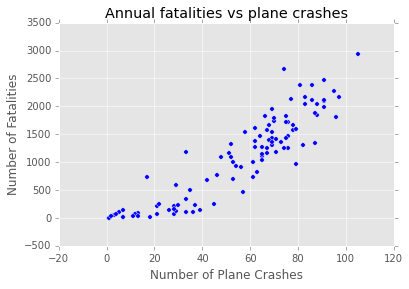

In [14]:
matplotlib.style.use('ggplot')
fig = plt.scatter(aircrashes_by_year,df_by_year)
plt.ylabel('Number of Fatalities')
plt.xlabel('Number of Plane Crashes')
plt.title("Annual fatalities vs plane crashes")
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

# High Correlation between the number of annual fatalities and the number 
# of annual plane crashes- obvious. Sanity Check!

## 5. Trend of Annual Deaths due to Plane Crashes

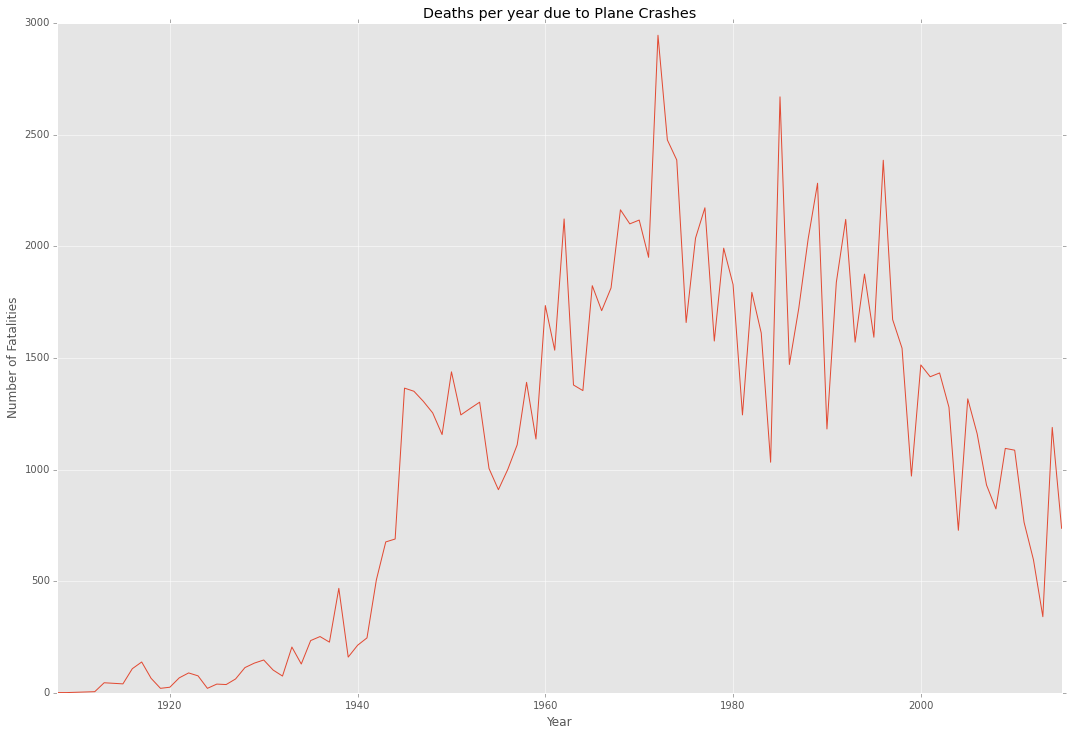

In [15]:
# visualize Deaths per year due to Plane Crashes using MatPlotLib
matplotlib.style.use('ggplot')
df_by_year.plot()
plt.ylabel('Number of Fatalities')
plt.xlabel('Year')
plt.title("Deaths per year due to Plane Crashes")
legend().set_visible(False)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 17
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

## 6. Trend of Plane Crashes over the years

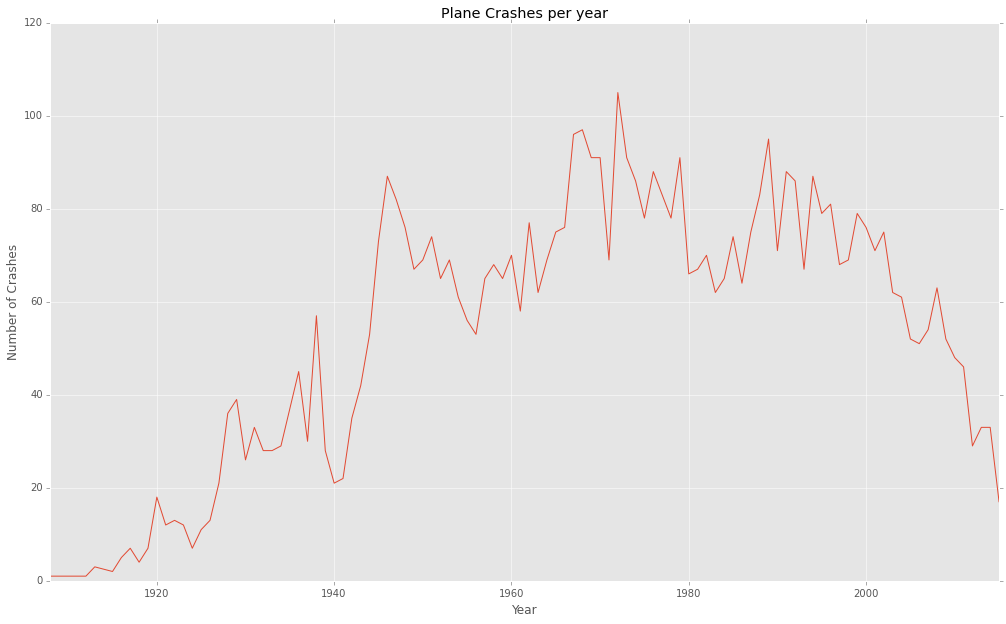

In [16]:
# visualize Plane Crashes per year using MatPlotLib
matplotlib.style.use('ggplot')
aircrashes_by_year.plot()
plt.ylabel('Number of Crashes')
plt.xlabel('Year')
plt.title("Plane Crashes per year")
legend().set_visible(False)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

## 7. Year with most fatalities

In [17]:
df_by_year.max()
print "Most fatalities observed in the year: " + str(df_by_year.idxmax())
print "Number of Deaths: " + str(df_by_year.max())

Most fatalities observed in the year: fatalities_total    1972
dtype: int64
Number of Deaths: fatalities_total    2946
dtype: int32


##Something is not right here
-  We know 2,977 people died during just two plane crashes on <b> Sept 11, 2001 (more popularly known as 9 /11) </b>
- This event in itself surpasses 1972

### Solution: Ground fatalities have not been accounted for!!

#### <u>Code Below:</u> Adds ground fatalities to the fatalities_total column

In [18]:
# COMPUTING TOTAL_DEATHS
# Doing it in Mongo because it's faster
# Import data from MongoDB
# for cur in collection.find({'fatalities_total' :{ '$exists':True }}):
#     if cur['ground'] != 'NULL' and cur['fatalities_total'] != 'NULL':
#         total_deaths = int(cur['fatalities_total']) + int(cur['ground'])
#     elif cur['ground'] == 'NULL' and cur['fatalities_total'] != 'NULL': 
#         total_deaths = int(cur['fatalities_total'])
#     elif cur['ground'] != 'NULL' and cur['fatalities_total'] == 'NULL':
#         total_deaths = int(cur['ground'])
#     else:
#         total_deaths = 'NULL'
#     collection.find_one_and_update({'_id':cur["_id"]},{'$set':{'total_deaths':total_deaths}})

## 8. Year with most flight crashes

In [19]:
aircrashes_by_year.max()
print "Most flight crashes observed in the year: " + str(aircrashes_by_year.idxmax())
print "Number of Deaths: " + str(aircrashes_by_year.max())

Most flight crashes observed in the year: total    1972
dtype: int64
Number of Deaths: total    105
dtype: int64


## 9. Frequency of Fatalities every decade 

In [20]:
bins_decade = [1905, 1915, 1925, 1935, 1945, 1955, 1965, 1975, 1985, 1995, 2005, 2015]
bins_decade_labels = ['1905-1915','1915-1925', '1925-1935', '1935-1945', '1945-1955', '1955-1965', '1965-1975', '1975-1985', '1985-1995', '1995-2005','2005-2015']

#### General Group By Logic

In [21]:
## Create a view that consists of the year and fatalities
df1 = df[['year','fatalities_total']]
#Taking all values except null
df_1 = df1[df1.fatalities_total != 'NULL']
df_1['fatalities_total']=df_1['fatalities_total'].astype(int)


# Create Histograms bin   |   value
by_year = df_1.groupby('year')
df_by_decade = by_year.sum()['fatalities_total']
df_by_decade.columns = ['year', 'fatalities_total']

print len(df_by_decade)
df_by_decade[:10]

105


C:\Users\admin\Downloads\WinPython-64bit-2.7.10.1\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


year
1908      1
1909      1
1912      5
1913     45
1915     40
1916    108
1917    138
1918     65
1919     20
1920     25
Name: fatalities_total, dtype: int32

In [22]:
#Creating new column with bins
categories = pd.cut(df_1['year'], bins_decade, labels=bins_decade_labels)
df_1['categories_decade'] = pd.cut(df_1['year'], bins_decade, labels=bins_decade_labels)
categories

by_decade = df_1.groupby('categories_decade')
decades_and_deaths = by_decade['fatalities_total'].aggregate(np.sum)
decades_and_deaths

C:\Users\admin\Downloads\WinPython-64bit-2.7.10.1\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


categories_decade
1905-1915       92
1915-1925      647
1925-1935     1237
1935-1945     4802
1945-1955    12242
1955-1965    14590
1965-1975    21329
1975-1985    17961
1985-1995    17693
1995-2005    14215
2005-2015     8725
Name: fatalities_total, dtype: int32

#### Dumping to CSV, so the CSV file can be used by the web app.

In [23]:
## Uncomment and run to create CSV 
# decades_and_deaths.to_csv(r'C:\Users\admin\Desktop\GE2324\decades_and_fatalities__.tsv', sep='\t', na_rep='NULL', encoding='utf8')

#### Onboard Fatalities + Ground Deaths (Total Deaths) every Decade

In [24]:
#Add ground fatalities to the fatalities_total column
# Doing it in Mongo because it's faster
# Import data from MongoDB
for cur in collection.find({'fatalities_total' :{ '$exists':True }}):
    if cur['ground'] != 'NULL' and cur['fatalities_total'] != 'NULL':
        total_deaths = int(cur['fatalities_total']) + int(cur['ground'])
    elif cur['ground'] == 'NULL' and cur['fatalities_total'] != 'NULL': 
        total_deaths = int(cur['fatalities_total'])
    elif cur['ground'] != 'NULL' and cur['fatalities_total'] == 'NULL':
        total_deaths = int(cur['ground'])
    else:
        total_deaths = 'NULL'
    collection.find_one_and_update({'_id':cur["_id"]},{'$set':{'total_deaths':total_deaths}})

In [25]:
cursor = collection.find()
df =  pd.DataFrame(list(cursor))


In [26]:
## Create a view that consists of the year and fatalities
df1 = df[['year','total_deaths']]
#Taking all values except null
df_1 = df1[df1.total_deaths != 'NAN']
df_1 = df1[df_1.total_deaths != 'NULL']
df_1['total_deaths']=df_1['total_deaths'].astype(int)


# Create Histograms bin   |   value
by_year = df_1.groupby('year')
df_by_decade = by_year.sum()['total_deaths']
df_by_decade.columns = ['year', 'total_deaths']


#Creating new column with bins
categories = pd.cut(df_1['year'], bins_decade, labels=bins_decade_labels)
df_1['categories_decade'] = pd.cut(df_1['year'], bins_decade, labels=bins_decade_labels)

by_decade = df_1.groupby('categories_decade')
decades_and_total_deaths = by_decade['total_deaths'].aggregate(np.sum)

C:\Users\admin\Downloads\WinPython-64bit-2.7.10.1\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\admin\Downloads\WinPython-64bit-2.7.10.1\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
decades_and_total_deaths
# Uncomment line below to create csv 
# decades_and_total_deaths.to_csv(r'C:\Users\admin\Desktop\GE2324\decades_and_total_deaths__.tsv', sep='\t', na_rep='NULL', encoding='utf8')

categories_decade
1905-1915       92
1915-1925      653
1925-1935     1265
1935-1945     5182
1945-1955    12411
1955-1965    14845
1965-1975    21775
1975-1985    18355
1985-1995    18134
1995-2005    17524
2005-2015     8966
Name: total_deaths, dtype: int32

## 10. Frequency of Crashes every Decade

In [28]:
by_decade = df_1.groupby('categories_decade')
decades_and_crashes = by_decade.count()
decades_and_crashes.columns = ['num_crashes','num_crashes1']
decades_and_crashes[['num_crashes']]
#decades_and_crashes[['num_crashes']].to_csv(r'decades_and_crashes__.tsv', sep='\t', na_rep='NULL', encoding='utf8')

num_crashes
categories_decade             
1905-1915                    8
1915-1925                   96
1925-1935                  290
1935-1945                  406
1945-1955                  706
1955-1965                  662
1965-1975                  880
1975-1985                  744
1985-1995                  795
1995-2005                  694
2005-2015                  426

## 11. Frequency of Fatalities every 5 years 

In [29]:
bins_5years = [1905,1910, 1915,1920, 1925, 1930, 1935,1940, 1945,1950, 1955,1960, 1965,1970, 1975,1980, 1985,1990, 1995,2000, 2005,2010, 2015]
bins_5years_labels = ['1905-1910','1910-1915','1915-1920','1920-1925', '1925-1930', '1930-1935', '1935-1940', '1940-1945','1945-1950','1950-1955','1955-1960','1960-1965', '1965-1970','1970-1975', '1975-1980','1980-1985', '1985-1990', '1990-1995','1995-2000', '2000-2005','2005-2010', '2010-2015']

In [30]:
## Create a view that consists of the year and fatalities
df1 = df[['year','fatalities_total']]
#Taking all values except null
df_1 = df1[df1.fatalities_total != 'NULL']
df_1['fatalities_total']=df_1['fatalities_total'].astype(int)


# Create Histograms bin   |   value
by_year = df_1.groupby('year')
df_by_5years = by_year.sum()['fatalities_total']
df_by_5years.columns = ['year', 'fatalities_total']
print len(df_by_5years)
df_by_5years[:10]

105


C:\Users\admin\Downloads\WinPython-64bit-2.7.10.1\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


year
1908      1
1909      1
1912      5
1913     45
1915     40
1916    108
1917    138
1918     65
1919     20
1920     25
Name: fatalities_total, dtype: int32

In [31]:
#Creating new column with bins
categories1 = pd.cut(df_1['year'], bins_5years, labels=bins_5years_labels)
df_1['categories_5years'] = pd.cut(df_1['year'], bins_5years, labels=bins_5years_labels)
categories1

by_5years = df_1.groupby('categories_5years')
fiveyears_and_deaths = by_5years['fatalities_total'].aggregate(np.sum)
print len(fiveyears_and_deaths)
fiveyears_and_deaths[:10]

22


C:\Users\admin\Downloads\WinPython-64bit-2.7.10.1\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


categories_5years
1905-1910       2
1910-1915      90
1915-1920     356
1920-1925     291
1925-1930     492
1930-1935     745
1935-1940    1320
1940-1945    3482
1945-1950    6506
1950-1955    5736
Name: fatalities_total, dtype: int32

In [32]:
# Uncomment to create CSV
# fiveyears_and_deaths.to_csv(r'fiveyears_and_fatalities__.tsv', sep='\t', na_rep='NULL', encoding='utf8')

#### Onboard Fatalities + Ground Deaths (Total Deaths) every Decade

In [33]:
## Create a view that consists of the year and fatalities
df1 = df[['year','total_deaths']]
#Taking all values except null
df_1 = df1[df1.total_deaths != 'NULL']
df_1['total_deaths']=df_1['total_deaths'].astype(int)


# Create Histograms bin   |   value
by_year = df_1.groupby('year')
df_by_decade = by_year.sum()['total_deaths']
df_by_decade.columns = ['year', 'total_deaths']


#Creating new column with bins
categories = pd.cut(df_1['year'], bins_5years, labels=bins_5years_labels)
df_1['categories_5years'] = pd.cut(df_1['year'], bins_5years, labels=bins_5years_labels)

by_5years = df_1.groupby('categories_5years')
fiveyears_and_total_deaths = by_5years['total_deaths'].aggregate(np.sum)

C:\Users\admin\Downloads\WinPython-64bit-2.7.10.1\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\admin\Downloads\WinPython-64bit-2.7.10.1\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [34]:
fiveyears_and_total_deaths
# Uncomment to create CSV
# fiveyears_and_total_deaths.to_csv(r'fiveyears_and_total_deaths__.tsv', sep='\t', na_rep='NULL', encoding='utf8')

categories_5years
1905-1910        2
1910-1915       90
1915-1920      356
1920-1925      297
1925-1930      492
1930-1935      773
1935-1940     1450
1940-1945     3732
1945-1950     6602
1950-1955     5809
1955-1960     6490
1960-1965     8355
1965-1970    10270
1970-1975    11505
1975-1980     9822
1980-1985     8533
1985-1990     9044
1990-1995     9090
1995-2000     8479
2000-2005     9045
2005-2010     5230
2010-2015     3736
Name: total_deaths, dtype: int32

## 12. Frequency of Crashes every 5 years


In [35]:
by_5years = df_1.groupby('categories_5years')
fiveyears_and_crashes = by_5years.count()
fiveyears_and_crashes.columns = ['num_crashes','num_crashes1']
fiveyears_and_crashes[['num_crashes']]
# fiveyears_and_crashes[['num_crashes']].to_csv(r'fiveyears_and_crashes__.tsv', sep='\t', na_rep='NULL', encoding='utf8')

num_crashes
categories_5years             
1905-1910                    2
1910-1915                    6
1915-1920                   41
1920-1925                   55
1925-1930                  135
1930-1935                  155
1935-1940                  181
1940-1945                  225
1945-1950                  381
1950-1955                  325
1955-1960                  321
1960-1965                  341
1965-1970                  451
1970-1975                  429
1975-1980                  406
1980-1985                  338
1985-1990                  388
1990-1995                  407
1995-2000                  373
2000-2005                  321
2005-2010                  268
2010-2015                  158

## 13. Month wise trends

In [36]:
df3 = df[['month','fatalities_total']]
print df3[df3.fatalities_total != 'NULL'].count()

df3 = df3[df3.fatalities_total != 'NULL']
df3['fatalities_total'] = df3['fatalities_total'].astype(float)
# fatalities by month
by_month = df3.groupby('month')
df_by_month = by_month.aggregate(np.sum)
print df_by_month
# df_by_month.to_csv(r'months_and_total_fatalities_.tsv', sep='\t', na_rep='NULL', encoding='utf8')

# aircrashes by month
by_month = df3.groupby('month')
aircrashes_by_month = by_month.agg({'fatalities_total':{'total':'count'}})
aircrashes_by_month.columns = aircrashes_by_month.columns.droplevel(0)
print aircrashes_by_month
# aircrashes_by_month.to_csv(r'months_and_total_crash.tsv', sep='\t', na_rep='NULL', encoding='utf8')

# total fatalities by month
df4 = df[['month','total_deaths']]
print df4[df4.total_deaths != 'NULL'].count()
df4 = df4[df4.total_deaths != 'NULL']
df4['total_deaths'] = df4['total_deaths'].astype(float)

by_month1 = df4.groupby('month')
df_by_month1 = by_month1.aggregate(np.sum)
# df_by_month1.to_csv(r'months_and_total_deaths_inclground.tsv', sep='\t', na_rep='NULL', encoding='utf8')
print df_by_month1

month               5707
fatalities_total    5707
dtype: int64
       fatalities_total
month                  
1                  9127
2                  8501
3                  9347
4                  7451
5                  7861
6                  8573
7                 10588
8                 10781
9                 10901
10                 8663
11                10591
12                11149
       total
month       
1        532
2        424
3        478
4        410
5        397
6        415
7        470
8        520
9        505
10       494
11       500
12       562
month           5707
total_deaths    5707
dtype: int64
       total_deaths
month              
1              9440
2              8705
3              9665
4              7593
5              8079
6              8716
7             10882
8             11117
9             13802
10             8944
11            10739
12            11520


## 14. Aircraft Manufacturers- Insights 

* This is a difficult string problem. Basically, the aircrat model number is given as a string, in the 'actype:' field. Now, we have to extract the name of the aircraft manufacturer out of this string. This is a non-trivial task, after we look at the dataset and see that there is no set standard/schema for storing the actype, for example: a schema like <-aircraft_manufacturer-> - <-build_year-> - <-build_model-> is not enforced on the data.


* When problems get non-trivial, hacking begins. The code below shows a string approximation algorithm, which is an <b> original hack. </b>

In [37]:
# Pre processing strings
# Takes a lot of time. Should've parallelized the for loop. 
import re
df3 = df[['actype:']]
_digits = re.compile('\d')

for index, row in df3.iterrows():
    #To lowercase
    tokens = [word.lower() for word in row['actype:'].split()]
    #Find tokens that contain digits
    actual_tokens = [bool(_digits.search(i)) for i in tokens]
    #Filter tokens- discard if they contain digits
    filtered_tokens = [ i for i in tokens if actual_tokens[tokens.index(i)]==False]
    #join filtered tokens, and remove all punctuation 
    s = re.sub(r'[^a-zA-Z\s]','',' '.join(filtered_tokens))
    df3['actype:'].iloc[index] = s

C:\Users\admin\Downloads\WinPython-64bit-2.7.10.1\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [38]:
by_actype = df3.groupby('actype:')
aircrashes_by_actype = by_actype.agg({'actype:':{'total':'count'}})
aircrashes_by_actype

actype:
                                    total
actype:                                  
                                       55
 cessna citation ii                     1
aegk                                    1
aermacchi aircraft                      1
aero commander                         13
aero commander ac                       1
aerocomp comp air                       1
aeroflot                                3
aeromarine model flying boat            1
aerospatiale                           13
aerospatiale alenia                     2
aerospatiale as super puma              1
aerospatiale bae concorde               1
aerospatiale caravelle                  5
aerospatiale caravelle super            1
aerospatiale corvette                   2
aerospatiale dauphin ii                 1
aerospatiale ecureuil                   1
aerospatiale eurocopter helicoper       1
aerospatiale nord                       1
aerospatiale puma                       3
aerospatiale rotocraft                  1
aerospeciale                            1
aerostar                                4
agusta mk ii                            1
airbus                                 42
airship                                 2
airspeed ambassador                     2
airspeed oxford                         1
amphibious asw                          1
...                                   ...
vickers                                 1
vickers valetta                         4
vickers valetta  avero lancaster        1
vickers vanguard                        4
vickers viking                         19
vickers viking  soviet fighter          1
vickers viscount                       59
vickers viscount                        1
vickers viscount  douglas               1
vickers viscount  fokker                1
vickers viscount d                      1
vickers vulcan                          1
vickers wellington bomber               1
volpar                                  2
vultee                                  1
waco model ylc                          1
wapiti                                  1
westland sea king helicopter            1
wibault                                 3
wright byplane                          1
wright flyer iii                        1
xian                                    1
xian yunshuji                           2
yakovlev                               51
yakovlev  mil                           1
yunshuji                                3
zeppelin                                1
zeppelin airship                       14
zeppelin dixmunde airship               1
zepplin air ship                        1

[797 rows x 1 columns]

In [39]:
words = []
from collections import Counter

for index, row in df3.iterrows():
    words.append(row['actype:'])
    
print words
print Counter(words).most_common()

[u'curtiss seaplane', u'zeppelin airship', u'schuttelanz airship', u'zeppelin airship', u'schuttelanz airship', u'zeppelin airship', u'zeppelin airship', u'zeppelin airship', u'zeppelin airship', u'zeppelin airship', u'de havilland', u'de havilland', u'caproni', u'de havilland', u'de havilland', u'curtiss', u'de havilland', u'farman', u'armstrongwhitworth', u'junkers', u'handley page', u'breguet', u'breguet', u'de havilland', u'breguet', u'royal airship works airship', u'potez ix', u'bristol tourer', u'dirigible roma airship', u'aeromarine model flying boat', u'de havilland  farman goliath', u'null', u'bleriot spad', u'lvg c vi', u'potez', u'breguet', u'de havilland', u'breguet', u'breguet', u'lioretolivier', u'breguet', u'farman goliath', u'de havilland', u'de havilland', u'junkers', u'de havilland', u'zeppelin dixmunde airship', u'de havilland', u'fokker fiii', u'junkers', u'de havilland', u'null', u'de havilland', u'junkers', u'breguet', u'breguet', u'fokker klm fiii', u'breguet', u

In [40]:
dic = Counter(words).most_common()
abc = dic
print len(dic)
print dic

797
[(u'douglas', 962), (u'boeing', 337), (u'antonov', 275), (u'cessna', 175), (u'ilyushin', 139), (u'de havilland canada twin otter', 129), (u'mcdonnell douglas', 118), (u'curtiss', 117), (u'beechcraft', 103), (u'tupolev', 100), (u'piper', 95), (u'junkers', 87), (u'lockheed hercules', 87), (u'convair', 83), (u'de havilland', 78), (u'fokker friendship', 74), (u'lockheed', 65), (u'fairchild', 65), (u'vickers viscount', 59), ('', 55), (u'brittennorman islander', 51), (u'yakovlev', 51), (u'learjet', 50), (u'embraer bandeirante', 47), (u'bell', 45), (u'lockheed electra', 44), (u'airbus', 42), (u'lockheed constellation', 37), (u'let', 36), (u'casa aviocar', 32), (u'cessna grand caravan', 29), (u'sikorsky', 29), (u'null', 25), (u'lockheed lodestar', 24), (u'breguet', 23), (u'beech', 23), (u'lockheed super constellation', 22), (u'fokker fellowship', 21), (u'hawker siddeley', 20), (u'vickers viking', 19), (u'mil', 19), (u'cessna caravan i', 19), (u'mil helicopter', 18), (u'fokker', 18), (u'pip

## Custom String Matching Algorithm, that approximates the titles of the aircraft manufacturers

In [41]:
rng = range(0,797,1)
xyz = []

for i in rng:
    xyz.append([])
    xyz.append([])
    xyz[i].append(dic[i][0])
    xyz[i].append(dic[i][1])

print xyz

for i in rng:
    try:
        a_string = xyz[i][0]
        print a_string
        print i
        for j in range(i+1,len(rng),1):
            try:
                print j
                b_string = xyz[j][0]
                print b_string
                if a_string in b_string and a_string !='':
                    print 'DETECTION a>b'
                    xyz[i][1] = xyz[i][1] + xyz[j][1]
                    xyz[j].pop(1)
                    xyz[j].pop(0)
                    xyz.pop(j)
                    print xyz[j]
                    rng.pop(-1)
                    print xyz[i]
                elif b_string in a_string and b_string !='':
                    print 'DETECTION b>A'
                    xyz[i][0] = xyz[j][0]
                    xyz[i][1] = xyz[i][1] + xyz[j][1]
                    xyz[j].pop(1)
                    xyz[j].pop(0)
                    xyz.pop(j)
                    print xyz[j]
                    rng.pop(-1)
                    print xyz[i]
            except:
                continue
    except:
        continue

[[u'douglas', 962], [u'boeing', 337], [u'antonov', 275], [u'cessna', 175], [u'ilyushin', 139], [u'de havilland canada twin otter', 129], [u'mcdonnell douglas', 118], [u'curtiss', 117], [u'beechcraft', 103], [u'tupolev', 100], [u'piper', 95], [u'junkers', 87], [u'lockheed hercules', 87], [u'convair', 83], [u'de havilland', 78], [u'fokker friendship', 74], [u'lockheed', 65], [u'fairchild', 65], [u'vickers viscount', 59], ['', 55], [u'brittennorman islander', 51], [u'yakovlev', 51], [u'learjet', 50], [u'embraer bandeirante', 47], [u'bell', 45], [u'lockheed electra', 44], [u'airbus', 42], [u'lockheed constellation', 37], [u'let', 36], [u'casa aviocar', 32], [u'cessna grand caravan', 29], [u'sikorsky', 29], [u'null', 25], [u'lockheed lodestar', 24], [u'breguet', 23], [u'beech', 23], [u'lockheed super constellation', 22], [u'fokker fellowship', 21], [u'hawker siddeley', 20], [u'vickers viking', 19], [u'mil', 19], [u'cessna caravan i', 19], [u'mil helicopter', 18], [u'fokker', 18], [u'piper n

In [42]:
list2 = [x for x in xyz if x != []]
list2

[[u'douglas', 1148],
 [u'boeing', 396],
 [u'antonov', 286],
 [u'cessna', 318],
 [u'ilyushin', 143],
 [u'de havilland canada', 216],
 [u'curtis', 141],
 [u'beech', 149],
 [u'tupolev', 107],
 [u'piper', 139],
 [u'junkers', 87],
 [u'lockheed hercule', 153],
 [u'convair', 88],
 [u'fokker', 92],
 [u'fairchild', 86],
 [u'vickers', 63],
 ['', 55],
 [u'norman', 57],
 [u'yakovlev', 52],
 [u'learjet', 62],
 [u'embraer bandeirant', 52],
 [u'bell', 69],
 [u'lockheed electra', 44],
 [u'airbus', 42],
 [u'lockheed constellation', 37],
 [u'let', 56],
 [u'casa', 42],
 [u'sikorsky', 54],
 [u'null', 25],
 [u'lockheed lodestar', 24],
 [u'breguet', 25],
 [u'super constellation', 24],
 [u'fokker fellowship', 22],
 [u'hawker', 38],
 [u'vickers viking', 20],
 [u'mi', 47],
 [u'bristol freighter', 20],
 [u'latecoere', 20],
 [u'lockheed orion', 17],
 [u'lockheed vega', 16],
 [u'catalina', 24],
 [u'de havilland heron', 16],
 [u'bac', 16],
 [u'dornier', 22],
 [u'martin', 23],
 [u'zeppelin', 18],
 [u'canadair', 22]

### Writing these results to an aircraft_types.tsv file, so that we could use it for visualisations later(refer to web site)

In [43]:
# filename = 'aircraft_type.tsv'
# target = open(filename, 'w')
# for i in list2:
#     target.write(i[0])
#     target.write('\t')
#     target.write(str(i[1]))
#     target.write('\t')
#     target.write('\n')
# target.close()

## 15. Aircraft Carriers- Insights 


In [44]:
df4 = df[['op']]

for index, row in df4.iterrows():
    #To lowercase
    tokens = [word.lower() for word in row['op'].split()]
    s = re.sub(r'[^a-zA-Z\s]','',' '.join(tokens))
    df4['op'].iloc[index] = s
    

C:\Users\admin\Downloads\WinPython-64bit-2.7.10.1\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [45]:
by_carriertype = df4.groupby('op')
aircrashes_by_carriertype = by_carriertype.agg({'op':{'total':'count'}})
aircrashes_by_carriertype[:20]

op
                                 total
op                                    
a b aerotransport                    2
aaxico airlines                      3
ab aerotransport                     3
ababeel aviaition                    1
abakan airlines                      1
acaancargo                           1
ace air cargo                        1
ace flying service                   1
aces colombia                        3
acme air                             1
action air express inc  air taxi     1
action airlines                      1
adam air                             1
adastra airways                      1
adc airlines                         2
aden airways                         2
ades colombia                        2
advance airlines                     1
adventure airlines                   2
aeca cargo                           1

In [46]:
# aircrashes_by_carriertype.to_csv(r'aircrashes_by_carrier_type.tsv', sep='\t', na_rep='NULL', encoding='utf8')

## 16. Scatterplot Matrix- Exploration

In [47]:
# Import data from MongoDB
cur1 = collection.find()
df_scatter =  pd.DataFrame(list(cur1))

In [48]:
df_necessary = df_scatter[['time','month','day','year','aboard_crew','aboard_passengers','aboard_total','fatalities_crew','fatalities_passengers','fatalities_total','ground']]

In [49]:
# Selecting NOT NULL tuples
df_necessary1 = df_necessary[df_necessary.aboard_crew != 'NULL']
df_necessary1 = df_necessary1[df_necessary1.aboard_passengers != 'NULL']
df_necessary1 = df_necessary1[df_necessary1.aboard_total != 'NULL']
df_necessary1 = df_necessary1[df_necessary1.aboard_crew != 'NaN']
df_necessary1 = df_necessary1[df_necessary1.aboard_passengers != 'NaN']
df_necessary1 = df_necessary1[df_necessary1.aboard_total != 'NaN']
df_necessary1 = df_necessary1[df_necessary1.time != 'NULL']
df_necessary1 = df_necessary1[df_necessary1.fatalities_crew != 'NULL']
df_necessary1 = df_necessary1[df_necessary1.fatalities_passengers != 'NULL']
df_necessary1 = df_necessary1[df_necessary1.fatalities_total  != 'NULL']
df_necessary1 = df_necessary1[df_necessary1.ground != 'NULL']

df_necessary1['aboard_crew'] = df_necessary1['aboard_crew'].astype(float)
df_necessary1['aboard_passengers'] = df_necessary1['aboard_passengers'].astype(float)
df_necessary1['aboard_total'] = df_necessary1['aboard_total'].astype(float)
df_necessary1['fatalities_crew'] = df_necessary1['fatalities_crew'].astype(float)
df_necessary1['fatalities_passengers'] = df_necessary1['fatalities_passengers'].astype(float)
df_necessary1['fatalities_total'] = df_necessary1['fatalities_total'].astype(float)
df_necessary1['ground'] = df_necessary1['ground'].astype(float)
df_necessary1 = df_necessary1[pd.notnull(df_necessary1['aboard_crew'])]
print df_necessary1

      time  month  day  year  aboard_crew  aboard_passengers  aboard_total  \
0     1718      9   17  1908            1                  1             2   
2     0630      7   12  1912            5                  0             5   
42    1215     12   14  1920            2                  6             8   
55    1740      8   24  1921           46                  0            46   
59    1140      3   22  1922            1                  5             6   
63    1645      7   16  1922            1                  4             5   
72    1340      5   14  1923            2                  4             6   
75    1800      9   14  1923            2                  3             5   
84    1200     12   24  1924            1                  7             8   
105   1315     10   21  1926            2                 10            12   
114   0830      8   22  1927            2                  9            11   
115   1530      9   17  1927            2                  5    

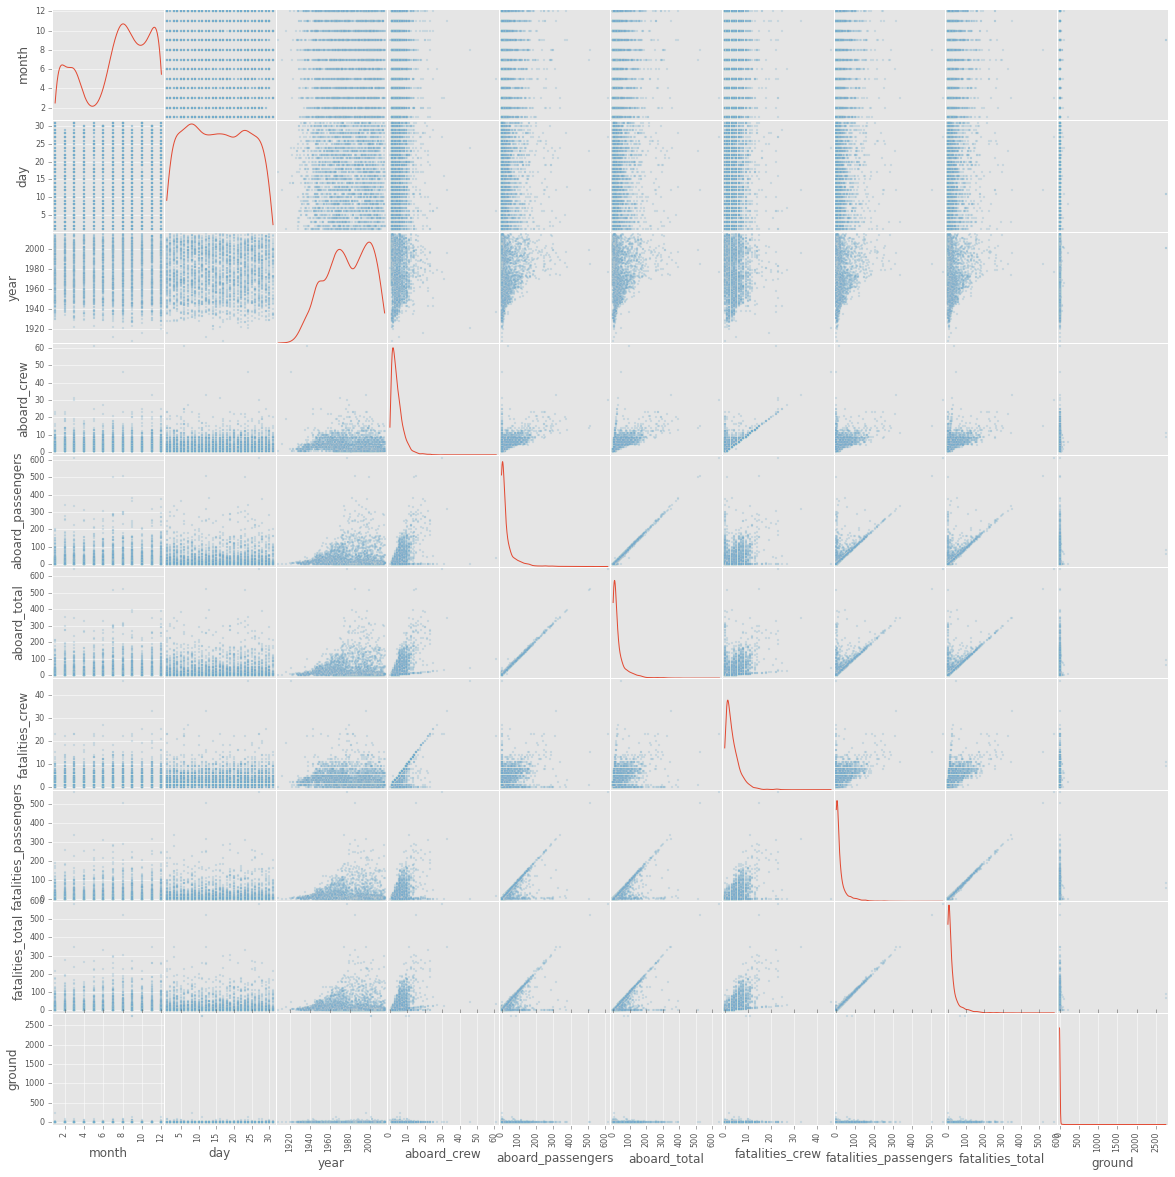

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

from pandas.tools.plotting import scatter_matrix
fg = scatter_matrix(df_necessary1, alpha=0.2, figsize=(20, 20), diagonal='kde')
# plt.savefig('scatterplot_matrix_.png', dpi=300) #save figure to file

In [51]:
%matplotlib inline
correlation = df_necessary1.corr(method='pearson', min_periods=1)
# correlation.to_csv("correlation_matrix.csv")
# For web app again
df_necessary1.corr(method='pearson', min_periods=1)

month       day      year  aboard_crew  \
month                  1.000000  0.028763 -0.016313     0.011689   
day                    0.028763  1.000000  0.000685     0.023773   
year                  -0.016313  0.000685  1.000000    -0.062771   
aboard_crew            0.011689  0.023773 -0.062771     1.000000   
aboard_passengers      0.026964  0.011215  0.081417     0.611860   
aboard_total           0.026723  0.012238  0.073027     0.657087   
fatalities_crew        0.008621  0.018939 -0.079056     0.782690   
fatalities_passengers  0.018696 -0.003226  0.042827     0.496284   
fatalities_total       0.018411 -0.001524  0.034082     0.536475   
ground                 0.015241 -0.013884  0.027625     0.039447   

                       aboard_passengers  aboard_total  fatalities_crew  \
month                           0.026964      0.026723         0.008621   
day                             0.011215      0.012238         0.018939   
year                            0.081417      0.073027        -0.079056   
aboard_crew                     0.611860      0.657087         0.782690   
aboard_passengers               1.000000      0.998223         0.361265   
aboard_total                    0.998223      1.000000         0.402315   
fatalities_crew                 0.361265      0.402315         1.000000   
fatalities_passengers           0.768140      0.768761         0.581788   
fatalities_total                0.759241      0.763289         0.635727   
ground                          0.019102      0.021130         0.050178   

                       fatalities_passengers  fatalities_total    ground  
month                               0.018696          0.018411  0.015241  
day                                -0.003226         -0.001524 -0.013884  
year                                0.042827          0.034082  0.027625  
aboard_crew                         0.496284          0.536475  0.039447  
aboard_passengers                   0.768140          0.759241  0.019102  
aboard_total                        0.768761          0.763289  0.021130  
fatalities_crew                     0.581788          0.635727  0.050178  
fatalities_passengers               1.000000          0.997665  0.030802  
fatalities_total                    0.997665          1.000000  0.033421  
ground                              0.030802          0.033421  1.000000

## 17. Text Mining- Agglomerative Clustering to determine causes of air crashes

* Code Computationally expensive to run. Result can be viewed [here](http://sykdesigns.com/GE2324/#9thPage/1)


* There is a summary field that has a few sentences of text for most aircrashes. Can we determine the reason for the aircrash just by looking at this text? This is an attempt.


* This has no real world application, as we'll most likely know the reason for the air crash, but it's a great exercise in Hierarchial Clustering of text data.

In [52]:
import pandas as pd
import nltk
import re
import IPython.core.display         # setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
from numpy import *

In [53]:
cursor = collection.find({'summary' :{ '$exists':True }})
counter = 0
text_arr1 = []
labels = []
ids =[]
# Find ids where summary fields exist
for cur in cursor:
    if not cur['summary'] == 'NULL':
        text_arr1.append(cur['summary'])
        labels.append(cur['summary'])
        ids.append(cur['_id'])

In [54]:
stopwords = nltk.corpus.stopwords.words('english')
print (stopwords)

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'nor', u

In [55]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_features=180000,
                                  stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem)

tfidf_matrix = tfidf_vectorizer.fit_transform(text_arr1) #fit the vectorizer to synopses

print(tfidf_matrix.shape)
print(type(tfidf_matrix))

terms = tfidf_vectorizer.get_feature_names()
print (str(terms))


(5440, 8217)
<class 'scipy.sparse.csr.csr_matrix'>
[u"'d", u"'s", u'+6g', u'-4g', u'-aircraft', u'-in-command', u'.45-calib', u'.othri', u'/decis', u'/passeng', u'/stope', u'05r', u'06r', u'07r', u'1,000m', u'1,450m', u'1,600m', u'1,700m', u'1,800m', u'1.5km', u'10,000ft', u'101st', u'105kt', u'1080m', u'10km', u'10kts', u'10th', u'11,000ft', u'11-degre', u'11-year-old', u'12nm', u'12th', u'13-meter', u'13-r', u'134kts', u'13c', u'14s', u'14th', u'15-month-old', u'15f', u'15l', u'16-inch', u'16km', u'171st', u'17h', u'18-year', u'180-degre', u'180deg', u'18l', u'18r', u'1900-c', u'1951.first', u'1engin', u'1km', u'1mile', u'1r', u'1st', u'1y', u'2,000ft', u'2,000ft.', u'2,000m', u'2,400ft', u'2,520m', u'2,800m', u'2-3km', u'2.5km', u'2/3rds', u'200m', u'21nm', u'228th', u'22km', u'22l', u'24l', u'25km', u'26k', u'26l', u'27deg', u'27l', u'28l', u'28nm', u'2km', u'2nm', u'3,000feet', u'3,830-foot', u'3.5km', u'30-day', u'300m', u'301st', u'30km', u'31-7952246the', u'31-minut', u'314th',

In [57]:
from sklearn.metrics.pairwise import cosine_similarity
matrix = cosine_similarity(tfidf_matrix)
print(matrix.shape)
print(type(matrix))

dist = 1 - cosine_similarity(tfidf_matrix)

print (shape(dist))



(5440L, 5440L)
<type 'numpy.ndarray'>
(5440L, 5440L)


In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram
# calculate full dendrogram
# Takes a long time. > O(N^2) complexity

def fancy_dendrogram(*args, **kwargs):

    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelsize=3
    )

    plt.tick_params(\
        axis= 'y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        labelsize=12)


    plt.tight_layout() #show plot with tight layout

    plt.savefig('ward_clusters_final.pdf', dpi=200) #save figure as ward_clusters

    return ddata


linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances
print linkage_matrix
fig, ax = plt.subplots(figsize=(1500, 1500)) # set size

fig.subplots_adjust(bottom = 0)
fig.subplots_adjust(top = 1)
fig.subplots_adjust(right = 1)
fig.subplots_adjust(left = 0)
fig.set_size_inches([200, 200])

ax = fancy_dendrogram(linkage_matrix, labels=labels, leaf_font_size=0.5, max_d=27  , show_contracted=True)


In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 28    #Picking Maximum Distance as 28, by intuition. Gives us 19 clusters.
clusters = fcluster(linkage_matrix, max_d, criterion='distance')
print(clusters)
filename = 'AIRCRAFT_CRASH_CLUSTERS_with_id.txt'
target = open(filename, 'w')
target.write('_id')
target.write('\t')
target.write('category')
target.write('\n')
for i,value in enumerate(clusters):
    print(str(ids[i]))
    target.write(str(ids[i]))
    target.write('\t')
    target.write(str(value))
    target.write('\n')
target.close()

## Opening this file in a dataframe, and appending the cluster to the ID, for visualisation purposes

In [ ]:
df_x = pd.read_csv('AIRCRAFT_CRASH_CLUSTERS_with_id.txt', sep='\t',header=0)
print df_x

In [ ]:
from bson.objectid import ObjectId
for index, row in df_x.iterrows():
    collection.find_one_and_update({'_id':ObjectId(row["_id"])},{'$set':{'category':row['category']}})

In [ ]:
#cursor = collection.find({'fatalities_total' :{ '$exists':True }})
cursor = collection.find()
dfx =  pd.DataFrame(list(cursor))
print dfx

### By changing the cat variable below[0-18], we can print out all the values in a particular cluster.

* If a trend is observed just by looking at the samples, we can generalize and predict what the criteria for clustering is, thereby determining a
category/class. If there is no visibile trend, we label the data as 'unknown'.


In [ ]:
dfx1 = dfx[['category','summary']]
cat = 18
filter_by_category = dfx1[dfx1.category == cat]
# filter_by_category.to_csv(r'C:\Users\admin\Desktop\GE2324\filter_by_category.tsv', sep='\t', na_rep='NULL', encoding='utf8')

In [ ]:
## Appending Category to the tuples
df_x1 = dfx[['category']]
by_category = df_x1.groupby('category')
aircrashes_by_category = by_category.agg({'category':{'total':'count'}})
aircrashes_by_category[:20]

In [ ]:
aircrashes_by_category.to_csv(r'C:\Users\admin\Desktop\GE2324\aircrashes_by_category.tsv', sep='\t', na_rep='NULL', encoding='utf8')